In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'], axis=1, inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.replace({'gender': {'Male':1, 'Female':0}}, inplace=True)

In [7]:
columns = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']

In [8]:
df.replace({'OnlineSecurity':{'No internet service':'No'}}, inplace=True)
df.replace({'OnlineBackup':{'No internet service':'No'}}, inplace=True)
df.replace({'DeviceProtection':{'No internet service':'No'}}, inplace=True)
df.replace({'TechSupport':{'No internet service':'No'}}, inplace=True)
df.replace({'StreamingTV':{'No internet service':'No'}}, inplace=True)
df.replace({'StreamingMovies':{'No internet service':'No'}}, inplace=True)
df.replace({'MultipleLines':{'No phone service':'No'}}, inplace=True)
df.replace({'MultipleLines':{'No phone service':'No'}}, inplace=True)

In [9]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [10]:
for column in columns:
  df.replace({column:{'Yes':1,'No':0}},inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [12]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [13]:
df.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [14]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [15]:
pd.to_numeric({'TotalCharges'}, errors='coerce')

{'TotalCharges'}

In [16]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,0,1,0,1,...,True,False,False,False,False,True,True,False,False,False
753,1,0,0,1,0,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
936,0,0,1,1,0,1,0,1,1,1,...,True,False,False,False,False,True,False,False,False,True
1082,1,0,1,1,0,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
1340,0,0,1,1,0,0,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
3331,1,0,1,1,0,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
3826,1,0,1,1,0,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
4380,0,0,1,1,0,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
5218,1,0,1,1,0,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
6670,0,0,1,1,0,1,1,0,1,1,...,True,False,False,False,False,True,False,False,False,True


In [17]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [18]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [19]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [22]:
tenure_churn_no = df[df.Churn==0].tenure
tenure_churn_yes = df[df.Churn==1].tenure

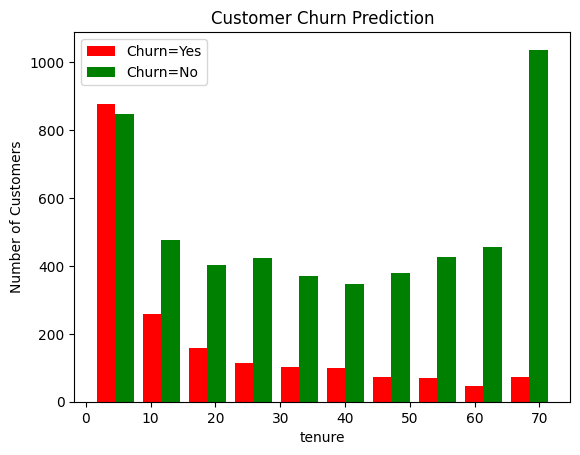

In [23]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.legend(labels=['Churn=Yes', 'Churn=No'])
plt.show()

In [24]:
monthly_charge_churn_no = df[df.Churn==0].MonthlyCharges
monthly_charge_churn_yes = df[df.Churn==1].MonthlyCharges

(array([[1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.],
        [ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

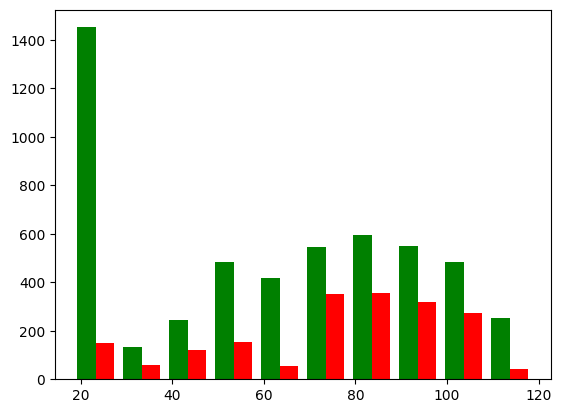

In [25]:
plt.hist([monthly_charge_churn_no, monthly_charge_churn_yes], color=['green','red'],label=['churn=No', 'churn=Yes'])

In [26]:
for column in df:
  print(f'{column} : {df[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electroni

In [27]:
df = df.astype(int)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
for column in df:
  print(f'{column} : {df[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [ 29  56  53  42  70  99  89 104  49  18 100 103 105 113  20 106  55  90
  39  19  59  30  64  96  95  66  45  69  74  97  79  76  84  80 108  24
 107  54  94  75  78 111 110  25  50  62  33  82  21  98  57  91  31  85
  88  23  58  35  44  71 101  68  86  73  81  51 109 112 102  46  93  65
  48  40  83 115 114  41  61  60  67  72  87  92 116  43  28  63  47  34
  26  52  77  36  38 118 117  22  37]
TotalCharges : [  29 1889  108 ... 1990 7362 6844]
Churn : [0 1]
InternetServi

In [30]:
# Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
for column in df:
  print(f'{column} : {df[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [35]:
df.dtypes

gender                                       int32
SeniorCitizen                                int32
Partner                                      int32
Dependents                                   int32
tenure                                     float64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [36]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2)

In [39]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [40]:
train_X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7015,1,1,1,0,0.464789,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
6732,0,0,0,0,0.323944,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3229,0,0,0,0,0.154930,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1467,0,0,0,0,0.309859,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1848,0,0,0,0,0.521127,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [41]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import models

In [42]:
model = models.Sequential([
    tfl.Flatten(input_shape=(26,)),
    tfl.Dense(128, activation='relu'),
    tfl.Dense(64, activation='relu'),
    tfl.Dense(32, activation='relu'),
    tfl.Dense(1,activation='sigmoid')
])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 26)                0         
                                                                 
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13825 (54.00 KB)
Trainable params: 13825 (54.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(train_X, train_Y, epochs=100)

Epoch 1/100


176/176 [==============================] - 3s 3ms/step - loss: 0.4665 - accuracy: 0.7728
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8036
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8071
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8084
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8110
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8094
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4003 - accuracy: 0.8162
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8171
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3916 - accuracy: 0.8197
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3920 - accu

In [46]:
model.evaluate(test_X, test_Y)

44/44 [==============================] - 0s 2ms/step - loss: 1.3034 - accuracy: 0.7512


[1.303377628326416, 0.7512437701225281]

In [47]:
y_pred = model.predict(test_X)

44/44 [==============================] - 0s 3ms/step


In [48]:
y_predict = []
for i in y_pred:
  if i>0.5:
    y_predict.append(1);
  else:
    y_predict.append(0);

In [49]:
test_Y[:10]

6934    0
4977    0
5446    1
1229    0
1768    0
2642    1
3983    1
5553    1
4302    0
3630    1
Name: Churn, dtype: int32

In [50]:
y_predict[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
conf_mat = confusion_matrix(test_Y, y_predict)

In [53]:
conf_mat

array([[844, 162],
       [188, 213]], dtype=int64)

In [54]:
import seaborn as sns

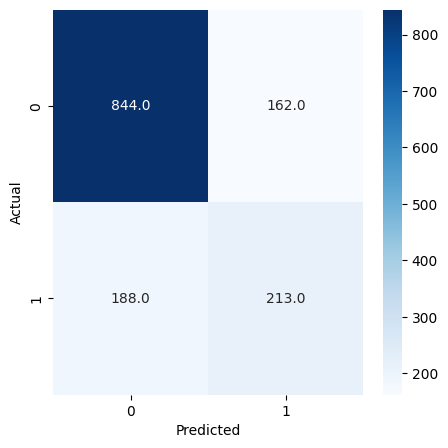

In [55]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='.1f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
print(f'Classification Report: \n{classification_report(test_Y, y_predict)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1006
           1       0.57      0.53      0.55       401

    accuracy                           0.75      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407

